## Hands On Machine Learning

## RNN with timestep 2

In [18]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [7]:
import numpy as np
import tensorflow as tf

In [5]:
n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1,Wx) + b)

init = tf.global_variables_initializer()

In [9]:
#mini batch
X0_batch = np.array([[0,1,2], [3,4,5], [6,7,8], [9,0,1]]) #t=0
X1_batch = np.array([[9,8,7], [0,0,0], [6,5,4], [3,2,1]]) #t=1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0,Y1], feed_dict={X0: X0_batch, X1:X1_batch})

In [10]:
print(Y0_val)

[[ 0.7767456  -0.9793735  -0.95792407  0.9866087  -0.99127686]
 [-0.8910331  -1.         -0.9999365   0.998537   -1.        ]
 [-0.99916595 -1.         -1.          0.99984115 -1.        ]
 [-1.         -1.          0.48144084 -0.9968041  -0.94122314]]


In [11]:
print(Y1_val)

[[-0.9999968  -1.         -0.9999845  -0.99209994 -1.        ]
 [-0.15906261 -0.9866116   0.73045105 -0.99600947 -0.68180436]
 [-0.9999926  -1.         -0.9988609  -0.9975606  -1.        ]
 [-0.9995028  -1.         -0.97731215 -0.9801067  -0.9913798 ]]


## Static_rnn

In [39]:
reset_graph()

In [40]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0,X1],
                                               dtype=tf.float32)
Y0,Y1 = output_seqs

In [41]:
output_seqs

[<tf.Tensor 'rnn/basic_rnn_cell/Tanh:0' shape=(?, 5) dtype=float32>,
 <tf.Tensor 'rnn/basic_rnn_cell/Tanh_1:0' shape=(?, 5) dtype=float32>]

In [42]:
output_seqs[-1] == states

True

In [43]:
n_steps = 2

In [53]:
reset_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                               dtype = tf.float32)

outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [54]:
init = tf.global_variables_initializer()

In [55]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # 샘플 1
        [[3, 4, 5], [0, 0, 0]], # 샘플 2
        [[6, 7, 8], [6, 5, 4]], # 샘플 3
        [[9, 0, 1], [3, 2, 1]], # 샘플 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [56]:
print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.9428799  -0.9998869   0.94055814  0.9999985  -0.9999997 ]]

 [[-0.8001535  -0.9921827   0.7817797   0.9971032  -0.9964609 ]
  [-0.637116    0.11300927  0.5798437   0.4310559  -0.6371699 ]]

 [[-0.93605185 -0.9998379   0.9308867   0.9999815  -0.99998295]
  [-0.9165386  -0.9945604   0.896054    0.99987197 -0.9999751 ]]

 [[ 0.9927369  -0.9981933  -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746338 -0.73191994  0.7827872   0.9525682  -0.9781773 ]]]


### 그래프가 너무 복잡해질 가능성, 더 커진 그래프를 그린다면 역전파 하는 동안 Out-of-Memory 에러가 발생할 것

## Dynamic-RNN (각 타임 스텝의 모든 입력에 대해 입력 텐서를 타임스텝마다 하나의 텐서로 반환함)

In [61]:
reset_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [62]:
init = tf.global_variables_initializer()

In [63]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # 샘플 1
        [[3, 4, 5], [0, 0, 0]], # 샘플 2
        [[6, 7, 8], [6, 5, 4]], # 샘플 3
        [[9, 0, 1], [3, 2, 1]], # 샘플 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [64]:
print(outputs_val)

[[[-0.85115266  0.87358344  0.5802911   0.8954789  -0.0557505 ]
  [-0.999996    0.99999577  0.9981815   1.          0.37679607]]

 [[-0.9983293   0.9992038   0.98071456  0.999985    0.25192663]
  [-0.7081804  -0.0772338  -0.85227895  0.5845349  -0.78780943]]

 [[-0.9999827   0.99999535  0.9992863   1.          0.5159072 ]
  [-0.9993956   0.9984095   0.83422637  0.99999976 -0.47325212]]

 [[ 0.87888587  0.07356028  0.97216916  0.9998546  -0.7351168 ]
  [-0.9134514   0.3600957   0.7624866   0.99817705  0.80142   ]]]


In [69]:
from tensorflow_graph_in_jupyter import show_graph

In [70]:
show_graph(tf.get_default_graph())

In [94]:
## 가변길이
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [95]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, sequence_length=seq_length, dtype = tf.float32)

In [96]:
init = tf.global_variables_initializer()

In [97]:
print(np.array([2, 1, 2, 2]))

[2 1 2 2]


In [98]:
X_batch = np.array([
        # 스텝 0     스텝 1
        [[0, 1, 2], [9, 8, 7]], # 샘플 1
        [[3, 4, 5], [0, 0, 0]], # 샘플 2 (0 벡터로 패딩), X에 맞추기 위해
        [[6, 7, 8], [6, 5, 4]], # 샘플 3
        [[9, 0, 1], [3, 2, 1]], # 샘플 4
    ])
seq_length_batch = np.array([2, 1, 2, 2]) #2122가 무슨 의미???

In [101]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
    [outputs, states], feed_dict={X :X_batch, seq_length : seq_length_batch})

In [102]:
print(outputs_val) #입력 시퀀스 길이를 초과하는 모든 타임 스텝에 대해 0벡터 출력

[[[-0.9123188   0.16516446  0.5548655  -0.39159346  0.20846416]
  [-1.          0.956726    0.99831694  0.99970174  0.96518576]]

 [[-0.9998612   0.6702289   0.9723653   0.6631046   0.74457586]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99999976  0.8967997   0.9986295   0.9647514   0.93662   ]
  [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]]

 [[-0.96435434  0.99501586 -0.36150697  0.9983378   0.999497  ]
  [-0.9613586   0.9568762   0.7132288   0.97729224 -0.0958299 ]]]


In [103]:
print(states_val)

[[-1.          0.956726    0.99831694  0.99970174  0.96518576]
 [-0.9998612   0.6702289   0.9723653   0.6631046   0.74457586]
 [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]
 [-0.9613586   0.9568762   0.7132288   0.97729224 -0.0958299 ]]


In [104]:
show_graph(tf.get_default_graph())

## Sequence Classifier

In [260]:
# image 행의 갯수가  n_steps, 열의 갯수가 n_inputs
reset_graph()
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X= tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

In [261]:
logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [262]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/')
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [213]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [214]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch,'train accuracy:', acc_train, 'test accuracy:', acc_test)

0 train accuracy: 0.93333334 test accuracy: 0.9311
1 train accuracy: 0.96666664 test accuracy: 0.9522


KeyboardInterrupt: 

## Time-series

In [215]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t): #?????
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)


In [298]:
reset_graph()
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [299]:
learning_ratelearning  = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [300]:
saver = tf.train.Saver()

In [301]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model")
#wrapper 사용 안할시에는 MSE가 잘 안줄어 든다.

0 	MSE: 15.145555
100 	MSE: 11.58152
200 	MSE: 10.433138
300 	MSE: 10.184452
400 	MSE: 9.151415
500 	MSE: 9.483527


KeyboardInterrupt: 

In [302]:
reset_graph()
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [303]:
#100개의 출력값, 100개의 뉴런에서 1개씩 출력을 하기 때문.
##실제로 원하는 것은 타임 스텝마다 하나의 출력.
cell = tf.contrib.rnn.OutputProjectionWrapper(
tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
                           ,output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

In [304]:
learning_ratelearning  = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [305]:
saver = tf.train.Saver()

In [306]:
outputs

<tf.Tensor 'rnn/transpose_1:0' shape=(?, 20, 1) dtype=float32>

In [308]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./my_time_series_model")
#wrapper 사용하면 빠르게 MSE가 떨어진다.

0 	MSE: 15.725586
100 	MSE: 0.53276
200 	MSE: 0.1611116
300 	MSE: 0.06677404
400 	MSE: 0.06362546
500 	MSE: 0.05239443
600 	MSE: 0.04159867
700 	MSE: 0.04463701
800 	MSE: 0.054753147
900 	MSE: 0.043549433
1000 	MSE: 0.042051844
1100 	MSE: 0.038797587
1200 	MSE: 0.039991815
1300 	MSE: 0.037354525
1400 	MSE: 0.034337636


#### Prediction with saved model

In [155]:
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

In [156]:
with tf.Session() as sess:                          # 책에는 없음
    saver.restore(sess, "./my_time_series_model")   # 책에는 없음

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})


INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [157]:
y_pred

array([[[-3.407753 ],
        [-2.4575484],
        [-1.1029298],
        [ 0.7815629],
        [ 2.2002175],
        [ 3.126768 ],
        [ 3.4037762],
        [ 3.3489153],
        [ 2.8798013],
        [ 2.2659323],
        [ 1.6447463],
        [ 1.5210768],
        [ 1.8972012],
        [ 2.7159088],
        [ 3.8894904],
        [ 5.140914 ],
        [ 6.142068 ],
        [ 6.666671 ],
        [ 6.6410103],
        [ 6.0725527]]], dtype=float32)

In [162]:
import matplotlib.pyplot as plt

In [168]:
resolution

0.1

In [171]:
len(t_instance)

21

In [170]:
len(t_instance[:-1])

20

In [173]:
t_instance

array([12.2  , 12.305, 12.41 , 12.515, 12.62 , 12.725, 12.83 , 12.935,
       13.04 , 13.145, 13.25 , 13.355, 13.46 , 13.565, 13.67 , 13.775,
       13.88 , 13.985, 14.09 , 14.195, 14.3  ])

In [175]:
time_series

<function __main__.time_series>

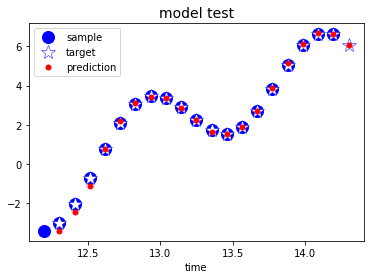

In [166]:
plt.title("model test", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14,\
         label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("time")

plt.show()

### 속도를 빠르게 하기 위해 OutputProjectionWrapper를 사용하지 않고, FNN을 이용해 차원 축소 후 reshape

In [291]:
reset_graph()
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation = tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_rnn_outputs, [-1, n_steps, n_outputs])

In [292]:
outputs

<tf.Tensor 'Reshape_1:0' shape=(?, 20, 1) dtype=float32>

In [293]:
saver = tf.train.Saver()

In [294]:
learning_ratelearning  = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [295]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model")

InvalidArgumentError: Incompatible shapes: [5000,20,1] vs. [50,20,1]
	 [[Node: sub = Sub[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Reshape_1, _arg_Placeholder_1_0_1)]]

Caused by op 'sub', defined at:
  File "/Users/sanghyub/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sanghyub/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-294-89e5d898a534>", line 3, in <module>
    loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 850, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 8188, in sub
    "Sub", x=x, y=y, name=name)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/Users/sanghyub/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [5000,20,1] vs. [50,20,1]
	 [[Node: sub = Sub[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Reshape_1, _arg_Placeholder_1_0_1)]]


## RNN의 창조성

In [309]:
with tf.Session() as sess:                        # 책에는 없음
    saver.restore(sess, "./my_time_series_model") # 책에는 없음

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [311]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

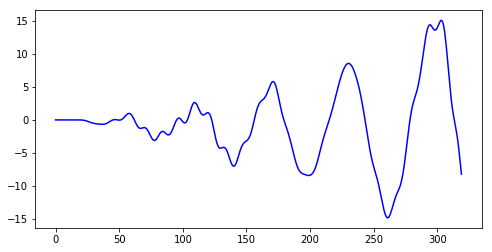

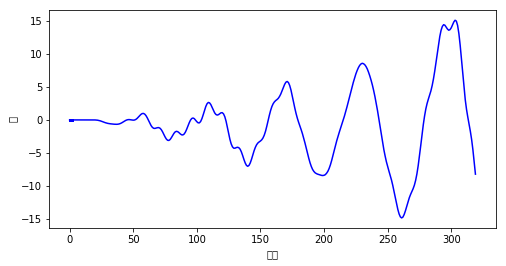

In [312]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")
plt.ylabel("값")
plt.show()


In [314]:
sequence[:n_steps]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

INFO:tensorflow:Restoring parameters from ./my_time_series_model


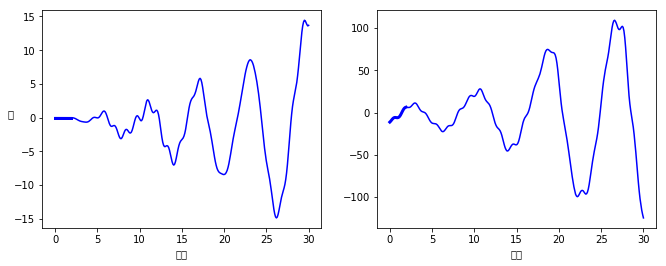

In [313]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")
plt.ylabel("값", rotation=0)

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("시간")

plt.show()

## Deep RNN

#### 심층 RNN은 RNN을 위로 쌓는 것이라고 생각하면 편하다. Deep (0), Wide(x)

In [315]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu)
         for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [316]:
init = tf.global_variables_initializer()

In [317]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [318]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [320]:
print(outputs_val.shape)

(2, 20, 100)


## Dropout in Deep RNN

#### DropoutWrapper

In [337]:
reset_graph()

In [338]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [339]:
keep_prob = tf.placeholder_with_default(1.0, shape=())

cells = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons)
        for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
             for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [340]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [341]:
n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:                   # not shown in the book
            print(iteration, "훈련 MSE:", mse) # not shown
    
    saver.save(sess, "./my_dropout_time_series_model")

0 훈련 MSE: 16.301746
100 훈련 MSE: 5.0248985
200 훈련 MSE: 3.3816354
300 훈련 MSE: 3.4762862
400 훈련 MSE: 2.5769875
500 훈련 MSE: 3.229934
600 훈련 MSE: 3.6599176
700 훈련 MSE: 4.0374355
800 훈련 MSE: 3.8894072
900 훈련 MSE: 3.8189845
1000 훈련 MSE: 3.2007902
1100 훈련 MSE: 4.5766945
1200 훈련 MSE: 3.2927246
1300 훈련 MSE: 3.181608
1400 훈련 MSE: 4.7470355


#### what is keep_probs?

In [347]:
with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


In [348]:
X_new.shape

(1, 20, 1)

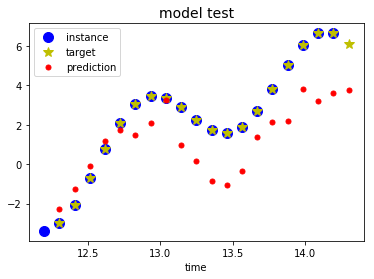

In [349]:
plt.title("model test", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "y*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("time")

plt.show()

#### dropout이 큰 도움이 되지 못함

## LSTM

In [352]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

In [353]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [354]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [355]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [357]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [359]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test.reshape((-1, n_steps, n_inputs))
X_valid = X_valid.reshape((-1, n_steps, n_inputs))

In [360]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print("epoch", epoch, "batch data accuracy =", acc_batch, "validation set accuracy =", acc_valid)
    
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print("test set accuracy =", acc_test)

epoch 0 batch data accuracy = 0.96666664 validation set accuracy = 0.962
epoch 1 batch data accuracy = 0.9533333 validation set accuracy = 0.9716
epoch 2 batch data accuracy = 0.96 validation set accuracy = 0.9644


KeyboardInterrupt: 

## NLP 자연어 처리, Embedding

In [361]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """디렉토리 생성, 이미 있다면 그냥 통과
    
    이 함수는 파이썬 2 버전을 지원하기 위해서입니다.
    파이썬 3.2 이상이면 다음과 같이 쓸 수 있습니다:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [362]:
words = fetch_words_data()

In [363]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

### Dictionary

In [364]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [365]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [366]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

In [367]:
words[24], data[24]

('culottes', 0)

### Creating Batch

In [368]:
import random
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # buffer 중간에 타깃 레이블을 둡니다
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [369]:
data_index=0
batch, labels = generate_batch(8, 2, 1)

In [370]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195], dtype=int32),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [371]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [3081],
        [   6],
        [ 195],
        [  12],
        [   6],
        [   2]], dtype=int32),
 ['as', 'anarchism', 'originated', 'a', 'term', 'as', 'a', 'of'])

### Modeling

In [372]:
batch_size = 128
embedding_size = 128  # 임베딩 벡터 차원
skip_window = 1       # 고려할 왼쪽과 오른쪽 단어의 개수
num_skips = 2         # 레이블을 생성하기 위한 입력의 재사용 횟수

# 가까운 이웃을 샘플링하기 위해 랜덤한 검증 세트를 만듭니다.
# 검증 샘플은 가장 흔한 단어인 낮은 ID 번호를 가진 것으로 제한합니다.
valid_size = 16     # 유사도를 평가하기 위해 랜덤하게 구성할 단어 세트 크기
valid_window = 100  # 검증 샘플을 전체 샘플의 앞 부분에서만 선택합니다
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # 부정 샘플링(negative sampling)의 수

learning_rate = 0.01

In [373]:
reset_graph()

# 입력 데이터
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)


In [374]:
vocabulary_size = 50000
embedding_size = 150

# 입력을 위해 임베딩을 조회합니다
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [375]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [376]:
# NCE 손실을 위한 변수를 만듭니다
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# 배치에서 NCE 손실의 평균을 계산합니다.Compute the average NCE loss for the batch.
# tf.nce_loss는 자동으로 손실을 평가할 때마다 음성 레이블에서 새로운 샘플을 뽑습니다.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Adam 옵티마이저
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# 미니배치 샘플과 모든 임베딩 사이의 코사인 유사도를 계산합니다
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# 초기화를 위한 연산
init = tf.global_variables_initializer()

### Training the model

In [377]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\r반복: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # 훈련 연산을 평가하여 스텝을 한 단계를 업데이트합니다(session.run()에서 반환된 값을 사용합니다)
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # 평균 손실은 2000개 배치에 대한 손실의 추정입니다.
            print("스텝 ", step, "에서의 평균 손실: ", average_loss)
            average_loss = 0

        # 이 코드는 비용이 많이 듭니다 (500 스텝마다 ~20%씩 느려집니다)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # 가장 가까운 단어의 개수
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "%s에 가장 가까운 단어:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

반복: 0	스텝  0 에서의 평균 손실:  294.812255859375
will에 가장 가까운 단어: commerce, slow, attested, obsession, christy, coursework, secretive, ballroom,
than에 가장 가까운 단어: lame, watts, stones, sram, elves, zarqawi, applets, cloves,
is에 가장 가까운 단어: interests, golfers, dropouts, richards, egyptians, legionnaires, leonel, opener,
four에 가장 가까운 단어: hom, rez, siege, translators, khalil, pegged, hellene, ynys,
d에 가장 가까운 단어: schuster, asgard, intriguing, catus, jewellery, leptons, goodwill, prosthetic,
system에 가장 가까운 단어: disturbed, alec, row, nazareth, onyx, stiffness, achievable, drinker,
new에 가장 가까운 단어: geralt, kissinger, caledonians, gimlin, brochure, hagen, freas, peremptory,
also에 가장 가까운 단어: milligan, incensed, mole, preventive, macha, penitent, pratt, cabal,
his에 가장 가까운 단어: pointers, ponty, charged, achieved, rk, blooming, value, juggernaut,
most에 가장 가까운 단어: mesons, restatement, cantigas, exploded, plastics, empower, inquisitors, cows,
more에 가장 가까운 단어: cactus, sta, reformation, poets, diligently, rsc, rava

In [379]:
np.save("./my_final_embeddings.npy", final_embeddings)

In [378]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "임베딩보다 레이블이 많습니다."
    plt.figure(figsize=(18, 18))  # 인치 크기
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

In [380]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [382]:
%matplotlib inline

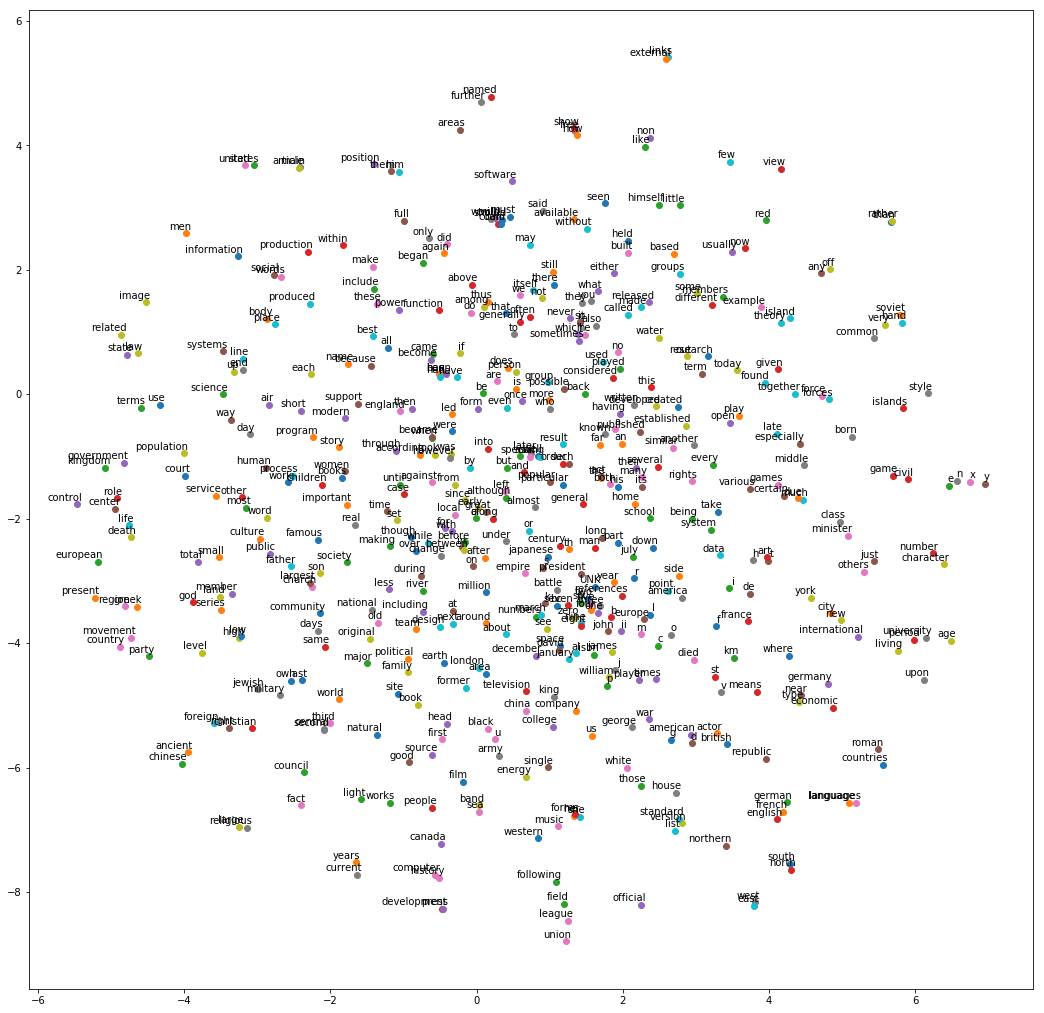

In [383]:
plot_with_labels(low_dim_embs, labels)